[View in Colaboratory](https://colab.research.google.com/github/djbrady/usb3Camera/blob/master/fovShift.ipynb)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [2]:
file3 = drive.CreateFile({'id': '1ct5p2Xx5ZfN30CCmQlfNpmcgQPW_svwh'})
print('Downloading file %s from Google Drive' % file3['title']) # 'hello.png'
file3.GetContentFile('images.zip')  # Save Drive file as a local file

In [3]:
%%bash
unzip images.zip
mv 18-06-24_dataset_10837 images

Archive:  images.zip
   creating: 18-06-24_dataset_10837/
  inflating: 18-06-24_dataset_10837/Dataset Documentation.txt  
   creating: 18-06-24_dataset_10837/sfov_vpmoved/
 extracting: 18-06-24_dataset_10837/sfov_vpmoved/01303.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01257.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01256.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01253.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01245.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01242.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01234.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01223.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01212.png  
 extracting: 18-06-24_dataset_10837/sfov_vpmoved/01191.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01188.png  
  inflating: 18-06-24_dataset_10837/sfov_vpmoved/01186.png  
 extracting: 18-06-24_dataset_10837/sfov_vpmoved/01182.png  
  inflating: 18-06-24_dataset_10837

In [4]:
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, SeparableConv2D
from keras.models import Model
from keras.models import Sequential
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16.0, 8.0) 


Using TensorFlow backend.


In [0]:
def load_input_image(index, target_size=(128, 128)):
  im1 = load_img("images/sfov/"+str(index).zfill(5)+".png", target_size=target_size)
  im1= img_to_array(im1) #converts image to numpy array
  im2 = load_img("images/lfov/"+str(index).zfill(5)+".png", target_size=target_size)
  im2= img_to_array(im2) #converts image to numpy array
  im1=np.dstack((im1,im2))
  im1 = im1*1./255
  return im1 #

def load_output_image(index, target_size=(128, 128)):
  im1 = load_img("images/sfov_vpmoved/"+str(index).zfill(5)+".png", target_size=target_size)
  im1= img_to_array(im1) #converts image to numpy array
  im1 = im1*1./255
  return im1 #





In [0]:
nI=2000
x_train=load_input_image(1)
x_train = np.reshape(x_train, [1, 128, 128, 6])
for pip in range(2,nI+1):
  x_train = np.concatenate((x_train,np.reshape(load_input_image(pip), [1, 128, 128, 6])))
y_train=load_output_image(1)
y_train = np.reshape(y_train, [1, 128, 128, 3])
for pip in range(2,nI+1):
  y_train = np.concatenate((y_train,np.reshape(load_output_image(pip), [1, 128, 128, 3])))

In [0]:
# Network parameters
batch_size = 128
kernel_size=3

In [0]:
# model
model = Sequential()
model.add(Conv2D(filters=12,kernel_size=6,
               activation='relu',
               padding='same',input_shape=(128,128,6)))
model.add(Conv2D(filters=12,kernel_size=6,
               activation='relu',
               padding='same'))
model.add(Conv2D(filters=18,kernel_size=4,
               activation='relu',
               padding='same'))
model.add(Conv2D(filters=18,kernel_size=4,
               activation='relu',
               padding='same'))
model.add(Conv2D(filters=12,kernel_size=kernel_size,
               activation='relu',
               padding='same'))
model.add(Conv2D(filters=12,kernel_size=kernel_size,
               activation='relu',
               padding='same'))
model.add(Conv2D(filters=3,kernel_size=kernel_size,
               activation='sigmoid',
               padding='same'))

In [0]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy', 'mae'])

In [25]:
model.fit(x_train,y_train, epochs=40, batch_size=64)

Epoch 1/40
2000/2000 [==============================] - 13s 7ms/step - loss: 0.0929 - acc: 0.7551 - mean_absolute_error: 0.2392
Epoch 2/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0470 - acc: 0.7684 - mean_absolute_error: 0.1417
Epoch 3/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0445 - acc: 0.6550 - mean_absolute_error: 0.1386
Epoch 4/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0427 - acc: 0.6390 - mean_absolute_error: 0.1359
Epoch 5/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0414 - acc: 0.7101 - mean_absolute_error: 0.1329
Epoch 6/40
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0404 - acc: 0.7531 - mean_absolute_error: 0.1303
Epoch 7/40
 832/2000 [===========>..................] - ETA: 6s - loss: 0.0410 - acc: 0.7489 - mean_absolute_error: 0.1334

2000/2000 [==============================] - 10s 5ms/step - loss: 0.0403 - acc: 0.7284 - mean_absolute_error: 0.1312
Epoch 8/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0401 - acc: 0.7495 - mean_absolute_error: 0.1307
Epoch 9/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0398 - acc: 0.6952 - mean_absolute_error: 0.1295
Epoch 10/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0397 - acc: 0.7082 - mean_absolute_error: 0.1307
Epoch 11/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0396 - acc: 0.6458 - mean_absolute_error: 0.1304
Epoch 12/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0397 - acc: 0.6449 - mean_absolute_error: 0.1302
Epoch 13/40
1088/2000 [===============>..............] - ETA: 4s - loss: 0.0395 - acc: 0.6626 - mean_absolute_error: 0.1290

2000/2000 [==============================] - 10s 5ms/step - loss: 0.0395 - acc: 0.6767 - mean_absolute_error: 0.1295
Epoch 14/40
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0397 - acc: 0.6475 - mean_absolute_error: 0.1312
Epoch 15/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0391 - acc: 0.6310 - mean_absolute_error: 0.1291
Epoch 16/40
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0390 - acc: 0.7127 - mean_absolute_error: 0.1296
Epoch 17/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0391 - acc: 0.6603 - mean_absolute_error: 0.1298
Epoch 18/40
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0391 - acc: 0.6924 - mean_absolute_error: 0.1296
Epoch 19/40
1088/2000 [===============>..............] - ETA: 4s - loss: 0.0394 - acc: 0.6803 - mean_absolute_error: 0.1296

2000/2000 [==============================] - 10s 5ms/step - loss: 0.0392 - acc: 0.6867 - mean_absolute_error: 0.1295
Epoch 20/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0389 - acc: 0.7032 - mean_absolute_error: 0.1293
Epoch 21/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0389 - acc: 0.7351 - mean_absolute_error: 0.1290
Epoch 22/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0386 - acc: 0.7147 - mean_absolute_error: 0.1288
Epoch 23/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0387 - acc: 0.7120 - mean_absolute_error: 0.1285
Epoch 24/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0387 - acc: 0.7425 - mean_absolute_error: 0.1291
Epoch 25/40
1088/2000 [===============>..............] - ETA: 4s - loss: 0.0383 - acc: 0.7051 - mean_absolute_error: 0.1277

2000/2000 [==============================] - 10s 5ms/step - loss: 0.0388 - acc: 0.7279 - mean_absolute_error: 0.1290
Epoch 26/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0391 - acc: 0.7511 - mean_absolute_error: 0.1295
Epoch 27/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0391 - acc: 0.6875 - mean_absolute_error: 0.1296
Epoch 28/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0385 - acc: 0.7100 - mean_absolute_error: 0.1280
Epoch 29/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0384 - acc: 0.7337 - mean_absolute_error: 0.1284
Epoch 30/40
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0385 - acc: 0.7719 - mean_absolute_error: 0.1282
Epoch 31/40
1088/2000 [===============>..............] - ETA: 4s - loss: 0.0389 - acc: 0.6950 - mean_absolute_error: 0.1286

2000/2000 [==============================] - 10s 5ms/step - loss: 0.0385 - acc: 0.7202 - mean_absolute_error: 0.1282
Epoch 32/40
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0387 - acc: 0.7867 - mean_absolute_error: 0.1288
Epoch 33/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0386 - acc: 0.6983 - mean_absolute_error: 0.1285
Epoch 34/40
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0383 - acc: 0.7628 - mean_absolute_error: 0.1284
Epoch 35/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0385 - acc: 0.7168 - mean_absolute_error: 0.1282
Epoch 36/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0384 - acc: 0.7549 - mean_absolute_error: 0.1280
Epoch 37/40
1088/2000 [===============>..............] - ETA: 4s - loss: 0.0385 - acc: 0.7874 - mean_absolute_error: 0.1296

2000/2000 [==============================] - 10s 5ms/step - loss: 0.0384 - acc: 0.7701 - mean_absolute_error: 0.1289
Epoch 38/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0384 - acc: 0.7369 - mean_absolute_error: 0.1279
Epoch 39/40
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0382 - acc: 0.7043 - mean_absolute_error: 0.1276
Epoch 40/40
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0384 - acc: 0.7737 - mean_absolute_error: 0.1281


In [0]:
dip=model.predict(np.reshape(load_input_image(5000), [1, 128, 128, 6]))

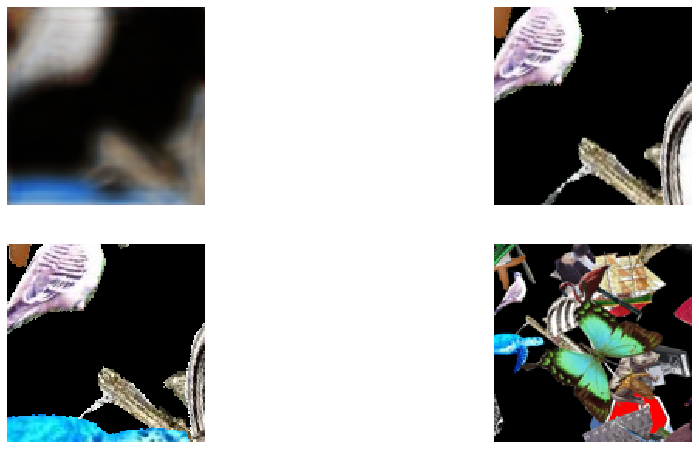

In [26]:

iN=1000
dip=model.predict(np.reshape(load_input_image(iN), [1, 128, 128, 6]))
pip=load_input_image(iN)
plt.subplot(2,2,1)
plt.imshow(dip[0,:,:,:])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.subplot(2,2,2)
plt.imshow(load_output_image(iN))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.subplot(2,2,3)
plt.imshow(pip[:,:,(0,1,2)])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.subplot(2,2,4)
plt.imshow(pip[:,:,(3,4,5)])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

In [18]:
pip.shape

(128, 128, 6)